# **Описание проекта: исследование интернет-магазина «Подарочек»**

В качестве тестового задания исследуйте данные онлайн-магазина подарков.

Магазин зачастую отправляет товары по почте, работает как с оптовыми, так и с розничными покупателями. 

Вы должны применить Python для анализа данных и показать, что можете самостоятельно решить задачу по исследованию данных, сегментации клиентов и проверке статистических гипотез.

## Описание данных

__Основной датасет (df)__
- entry_date — дата записи;
- order_id — идентификационный номер заказа;
- customer_id — идентификационный номер клиента;
- quantity — количество;
- price — цена;
- name_clust — автоматически присвоенная группа записи на основе названия;
- entry_id — идентификационный номер записи;
- country_id — идентификационный номер страны.

__Текстовое описание записей (df_text)__
- entry_id — идентификационный номер записи;
- entry — запись.

Датасеты содержит данные, которые несут в себе информацию о клиентах онлайн магазина Подарочек
- основной датасет содержит информацию о заказах, включая дату, идентификаторы заказов и клиентов, количество товаров, их цену

- текстовый датасет дополняет основной датасет описаниями записей

__Цель работы__

- Необходимо исследовать данные онлайн-магазина подарков с целью анализа поведения клиентов, сегментации их на основе различных характеристик и проверки статистических гипотез. 
- Данный проект  поможет  как понять исследуемых клиентов,так и  улучшить взаимодействие компании  с ними, что приведет к повышению эффективность бизнесса компании.

__План работы:__ <a name="chapter0"></a>
- [Шаг 1. Получение, осмотр и объединение данных](#chapter1)
  - Загрузка данных из csv-файлов в датафреймы.
  - Изучить общую информацию о датафреймах.
  -  Проверить наличие пропусков и принять решение о их заполнении.
  - Проверить наличие дубликатов и принять решение о их удалении.
  - Привести типы данных в каждом столбце к нужным форматам.
  -  Проверить соответствие идентификационных номеров.
  -  Объединить информацию из всех датафреймов в один.
-  [Шаг 2. Предобработка и начало исследовательского анализа](#chapter2)
   -  Найдите выбросы и аномальные значения в столбцах price и quantity, рассчитайте сумму стоимости каждой товарной позиции в датасете, примите и реализуйте решение о сохранении или отбрасывании подозрительных данных.
   -  Изучите столбцы order_id, customer_id, name_clust, entry_id и country_id.
   -  Изучите полноту данных, анализируя время записей. Посчитайте по месяцам количество дней, в которых не было продаж. Выберите период для анализа, содержащий основную часть данных, и далее работайте только с актуальными данными.

- [Шаг 3. Расчёт метрик](#chapter3)
    - Оцените по часам и дням недели количество заказов и количество уникальных покупателей. Постройте графики и сделайте вывод о наличии цикличности в покупательской активности.
    - Рассчитайте по месяцам среднюю выручку с клиента в день и количество уникальных покупателей. Сделайте вывод о наличии или отсутствии сезонности, если это возможно.
    - Рассчитайте стики-фактор за второй и третий квартал 2019 года.
    - Составьте профиль каждого клиента, включите в профиль количество заказов, дату первого и последнего заказа, общую сумму всех заказов, среднюю цену заказа, а также другие показатели по вашему выбору.
    - Разделите клиентов на возвратных и нет по признаку наличия повторных покупок, для каждой из групп на основе профилей клиентов (когда это возможно) рассчитайте средние показатели и оцените их.
- [Шаг 4. Проведение RFM-сегментацию клиентов](#chapter4)
    - разделите клиентов на группы по методике RFM;
    - оцените получившиеся группы, найдите похожие и различающиеся;
    - сформулируйте рекомендации для бизнеса по взаимодействию с сегментами, сопроводив их подходящими графиками и таблицами.
- [Шаг 5.Проверка статистических гипотез](#chapter5)
    - Сравните доли возвратных и невозвратных клиентов за второй и третий квартал 2019 года при помощи подходящего статистического теста.
    - Сравните средние чеки в странах с country_id, равному 3, 6 и 24. На основе статистических тестов сделайте вывод о том, отличаются ли средние чеки в этих странах или нет.
    - Сформулируйте собственную гипотезу и проверьте её.
- [Шаг 6. Выводы по проекту](#chapter6)
    - Опишите полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

# Шаг 2. Предобработка и начало исследовательского анализа <a name="chapter2"></a>

1. Найдите выбросы и аномальные значения в столбцах price и quantity
-  рассчитайте сумму стоимости каждой товарной позиции в датасете
-  примите и реализуйте решение о сохранении или отбрасывании подозрительных данных.

__начнём с метода describe, кооторый хорошо показывают основную статистику по набору в столбце__

In [94]:
comb_data.shape

(353367, 9)

In [95]:
# Основные статистические показатели для 'price'
price_stats = comb_data['price'].describe()
print(price_stats)
print('')
# Основные статистические показатели для 'quantity'
quantity_stats = comb_data['quantity'].describe()
print(quantity_stats)

count    3.533670e+05
mean     4.016779e+02
std      5.084618e+03
min     -1.106206e+06
25%      1.250000e+02
50%      2.080000e+02
75%      4.130000e+02
max      1.354133e+06
Name: price, dtype: float64

count    353367.000000
mean         10.218348
std         147.510432
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64


- присуствуют отрицательные значения и сильно большие положительные значения, что безусловно указывает на выбросы и аномалии.

__теперь визуализируем колонки price и quantity__

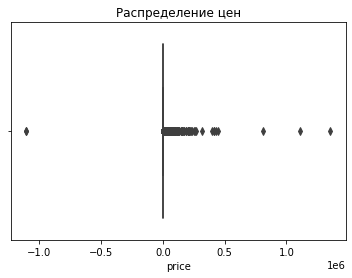

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=comb_data['price']) 
plt.title('Распределение цен')
plt.show()

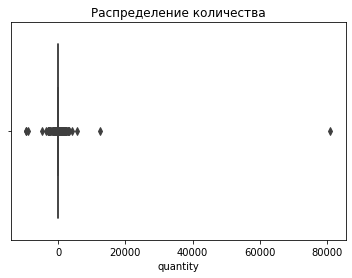

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=comb_data['quantity'])
plt.title('Распределение количества')
plt.show()

__выделим выбросы и фильруем__

In [98]:
# Выявление выбросов для 'price'
Q1_price = comb_data['price'].quantile(0.25)
Q3_price = comb_data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lb_price = Q1_price - 1.5 * IQR_price
upb_price = Q3_price + 1.5 * IQR_price
# Фильтрация выбросов для 'price'
price_lb_upb = comb_data[(comb_data['price'] < lb_price) | (comb_data['price'] > upb_price)]

print(f'Количество выбросов в столбце price: {price_lb_upb.shape[0]}')
print(f'процент от всех данных: {(price_lb_upb.shape[0]/comb_data.shape[0])*100}')

Количество выбросов в столбце price: 26875
процент от всех данных: 7.60540740929402


In [99]:
# Выявление выбросов для 'quantity'
Q1_quantity = comb_data['quantity'].quantile(0.25)
Q3_quantity = comb_data['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lb_quantity = Q1_quantity - 1.5 * IQR_quantity
upb_quantity = Q3_quantity + 1.5 * IQR_quantity
# Фильтрация выбросов для 'quantity'
quantity_lb_upb = comb_data[(comb_data['quantity'] < lb_quantity) | (comb_data['quantity'] > upb_quantity)]

print(f'Количество выбросов в столбце quantity: {quantity_lb_upb.shape[0]}')
print(f'процент от всех данных: {(quantity_lb_upb.shape[0]/comb_data.shape[0])*100}')

Количество выбросов в столбце quantity: 39365
процент от всех данных: 11.139976285278479


In [100]:
# Фильтрация данных без выбросов
filtered_data = comb_data[
    (comb_data['price'] >= lb_price) & (comb_data['price'] <= upb_price) &
    (comb_data['quantity'] >= lb_quantity) & (comb_data['quantity'] <= upb_quantity)
]

print(f'Размер датафрейма после удаления выбросов: {filtered_data.shape}')

# Рассчитаем уменьшение количества строк
print(f'Количество строк уменьшилось на: {(1 - (filtered_data.shape[0] / comb_data.shape[0])) * 100}%')

Размер датафрейма после удаления выбросов: (287428, 9)
Количество строк уменьшилось на: 18.660203131588403%


далее работаем с filtered_data

рассчитаем сумму стоимости каждой товарной позиции в датасете

In [103]:
# Рассчитаем общую стоимость каждой товарной позиции 
filtered_data['total_cost'] = filtered_data['quantity'] * filtered_data['price']
filtered_data.head()

/tmp/ipykernel_31/1607913489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['total_cost'] = filtered_data['quantity'] * filtered_data['price']


,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550


In [106]:
# Рассчитаем общую стоимость каждой товарной позиции с использованием .loc
filtered_data.loc[:, 'total_cost'] = filtered_data['quantity'] * filtered_data['price']

# Проверка первых строк данных после преобразования
filtered_data.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550


применим еще раз метод describe

In [107]:
# Основные статистические показатели для 'price'
print(filtered_data['price'].describe())
print('')
# Основные статистические показатели для 'quantity'
print(filtered_data['quantity'].describe())

count    287428.000000
mean        256.170307
std         183.019977
min           0.000000
25%         125.000000
50%         208.000000
75%         375.000000
max         833.000000
Name: price, dtype: float64

count    287428.000000
mean          4.925637
std           4.528230
min         -12.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          23.000000
Name: quantity, dtype: float64


__min         -12.000000__
- нужно дополнительно еще отфильтровать quantity

In [108]:
# Фильтрация отрицательных значений в quantity
filtered_data = filtered_data[filtered_data['quantity'] > 0]

print(f'Размер датафрейма после удаления отрицательных значений в quantity: {filtered_data.shape}')
print(filtered_data['quantity'].describe())

Размер датафрейма после удаления отрицательных значений в quantity: (287044, 10)
count    287044.000000
mean          4.938887
std           4.515071
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          23.000000
Name: quantity, dtype: float64


2. Изучите столбцы order_id, customer_id, name_clust, entry_id и country_id.

In [109]:
# Рассчитаем общую стоимость каждой товарной позиции 
filtered_data['total_cost'] = filtered_data['quantity'] * filtered_data['price']
filtered_data.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550


Изучите столбцы order_id, customer_id, name_clust, entry_id и country_id.

In [110]:
filtered_data[['order_id','customer_id','entry_id','country_id']].describe()

,order_id,customer_id,entry_id,country_id
count,287044.000000,287044.000000,287044.000000,287044.000000
mean,26840.026055,3357.074431,1510.617020,26.966601
std,13422.453882,2544.366348,826.781953,4.577417
min,3031.000000,-1.000000,0.000000,0.000000
25%,14876.000000,-1.000000,877.000000,28.000000
50%,27490.000000,3451.000000,1538.000000,28.000000
75%,38769.000000,5502.000000,2194.000000,28.000000
max,48253.000000,7653.000000,2916.000000,29.000000


выделяются аозможные ошибки
- customer_id=-1
- entry_id=0
- country_id=0

In [111]:
filtered_data['customer_id'].value_counts()

-1       79796
 2159     4899
 5904     3181
 7252     2773
 5394     1723
         ...  
 4639        1
 6783        1
 3613        1
 7032        1
 3922        1
Name: customer_id, Length: 4074, dtype: int64

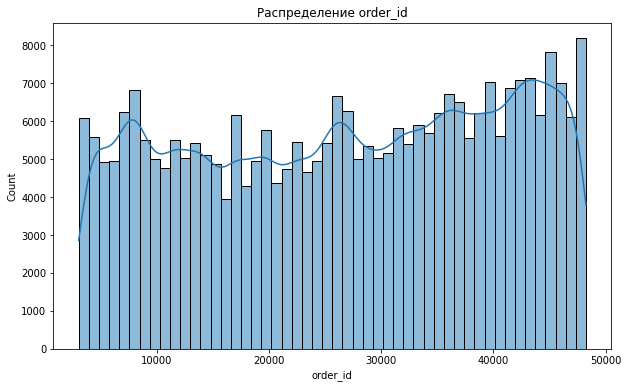

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма для 'order_id'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['order_id'], bins=50, kde=True)
plt.title('Распределение order_id')
plt.show()

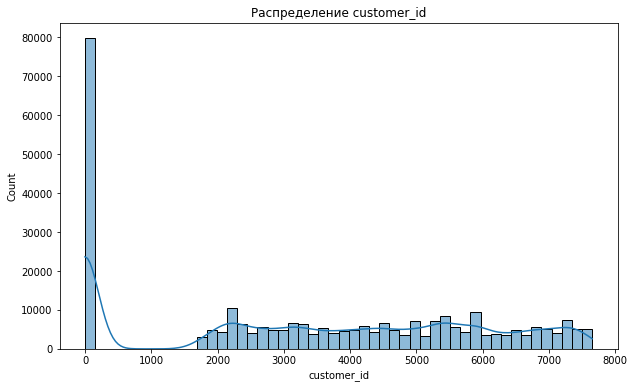

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма для 'customer_id'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['customer_id'], bins=50, kde=True)
plt.title('Распределение customer_id')
plt.show()

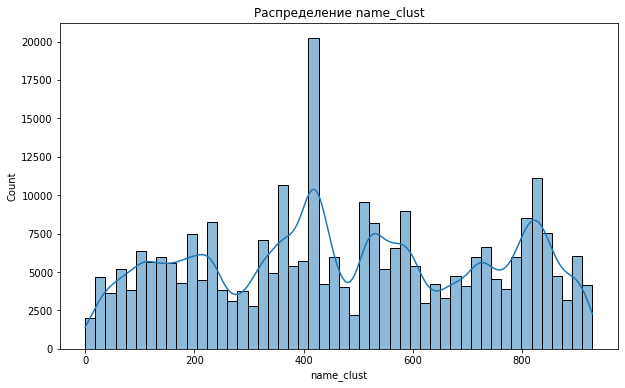

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма для 'name_clust'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['name_clust'], bins=50, kde=True)
plt.title('Распределение name_clust')
plt.show()

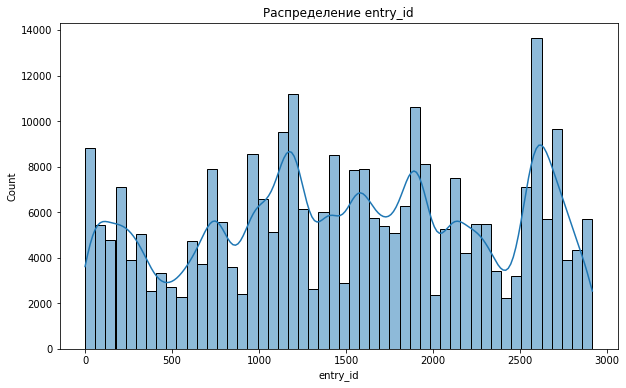

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма для 'entry_id'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['entry_id'], bins=50, kde=True)
plt.title('Распределение entry_id')
plt.show()

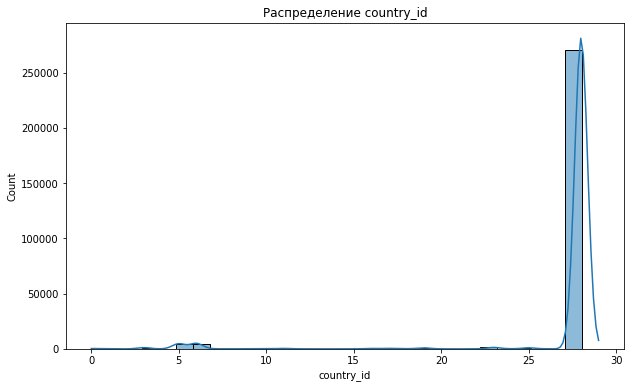

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt


# Гистограмма для 'country_id'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['country_id'], bins=30, kde=True)
plt.title('Распределение country_id')
plt.show()

- значений -1 customer_idслишком много
- решено их не трогать

3. Изучите полноту данных, анализируя время записей. Посчитайте по месяцам количество дней, в которых не было продаж. Выберите период для анализа, содержащий основную часть данных, и далее работайте только с актуальными данными.

In [117]:
filtered_data.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550


In [118]:
# Добавим столбцы с годом и месяцем
filtered_data['year'] = filtered_data['entry_date'].dt.year 
filtered_data['month'] = filtered_data['entry_date'].dt.month
filtered_data.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost,year,month
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034,2018,12
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200,2018,12
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034,2018,12
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530,2018,12
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550,2018,12


In [119]:
filtered_data['year'].value_counts()

2019    265411
2018     21633
Name: year, dtype: int64

In [120]:
filtered_data['month'].value_counts()

11    46268
12    35590
10    32300
9     26095
7     21431
5     19668
6     19518
1     18759
3     18744
8     18695
4     15753
2     14223
Name: month, dtype: int64

___Подсчитать количество дней в каждом месяце, в которые не было продаж, на основе временных данных.___

In [121]:
# Группируем данные по годам, месяцам и дням
sales_by_day = filtered_data.groupby(['year', 'month', filtered_data['entry_date'].dt.day]).size().reset_index(name='counts')
sales_by_day

,year,month,entry_date,counts
0,2018,12,1,1600
1,2018,12,2,1013
2,2018,12,3,1091
3,2018,12,5,1496
4,2018,12,6,2084
...,...,...,...,...
300,2019,12,5,2974
301,2019,12,6,1868
302,2019,12,7,1077
303,2019,12,8,2801


In [122]:
# Подсчитываем количество дней с продажами в каждом месяце
days_with_sales = sales_by_day.groupby(['year', 'month'])['counts'].count().reset_index(name='days_with_sales')
days_with_sales

,year,month,days_with_sales
0,2018,12,20
1,2019,1,24
2,2019,2,24
3,2019,3,27
4,2019,4,21
5,2019,5,25
6,2019,6,26
7,2019,7,26
8,2019,8,26
9,2019,9,26


In [123]:
# Подсчитываем общее количество дней в каждом месяце
days_in_month = sales_by_day.groupby(['year', 'month'])['entry_date'].apply(lambda x: x.max()).reset_index(name='days_in_month')
days_in_month

,year,month,days_in_month
0,2018,12,23
1,2019,1,31
2,2019,2,28
3,2019,3,31
4,2019,4,28
5,2019,5,31
6,2019,6,30
7,2019,7,31
8,2019,8,31
9,2019,9,30


In [124]:
# Объединяем данные для получения итогового результата
sales_analysis = pd.merge(days_in_month, days_with_sales, on=['year', 'month'])
sales_analysis['days_without_sales'] = sales_analysis['days_in_month'] - sales_analysis['days_with_sales']
print(sales_analysis)

    year  month  days_in_month  days_with_sales  days_without_sales
0   2018     12             23               20                   3
1   2019      1             31               24                   7
2   2019      2             28               24                   4
3   2019      3             31               27                   4
4   2019      4             28               21                   7
5   2019      5             31               25                   6
6   2019      6             30               26                   4
7   2019      7             31               26                   5
8   2019      8             31               26                   5
9   2019      9             30               26                   4
10  2019     10             31               26                   5
11  2019     11             30               26                   4
12  2019     12              9                8                   1


- определили количество дней без продаж для каждого месяца.
- в дальнейшем может понадобится для выявления периода например низкой активности клиента 

визуализаруем дни без продаж по месяцаи

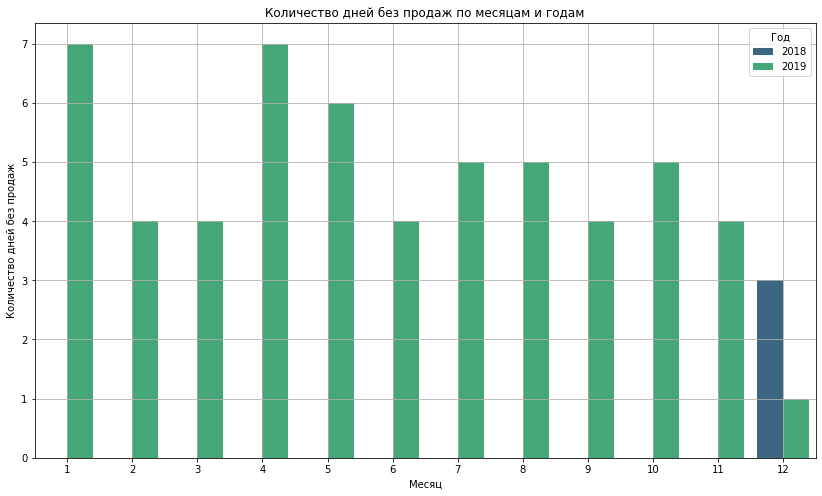

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_analysis, x='month', y='days_without_sales', hue='year', palette='viridis')

# Настройки графика
plt.title('Количество дней без продаж по месяцам и годам')
plt.xlabel('Месяц')
plt.ylabel('Количество дней без продаж')
plt.legend(title='Год')
plt.grid(True)

# Показать график
plt.show()

выводы по граифку
- в декабре 2018 и 2019 годов минимум дней без продаж. Объяснимо самим типом месяца для продаж
- максимум в январе и марте

___Выбор периода для анализа___
- оределим по годам и мемяцам наибольшее количество записей

In [126]:
# Подсчет количества записей по годам и месяцам
records_per_year_month = filtered_data.groupby(['year', 'month']).size().reset_index(name='counts')
print(records_per_year_month)

    year  month  counts
0   2018     12   21633
1   2019      1   18759
2   2019      2   14223
3   2019      3   18744
4   2019      4   15753
5   2019      5   19668
6   2019      6   19518
7   2019      7   21431
8   2019      8   18695
9   2019      9   26095
10  2019     10   32300
11  2019     11   46268
12  2019     12   13957


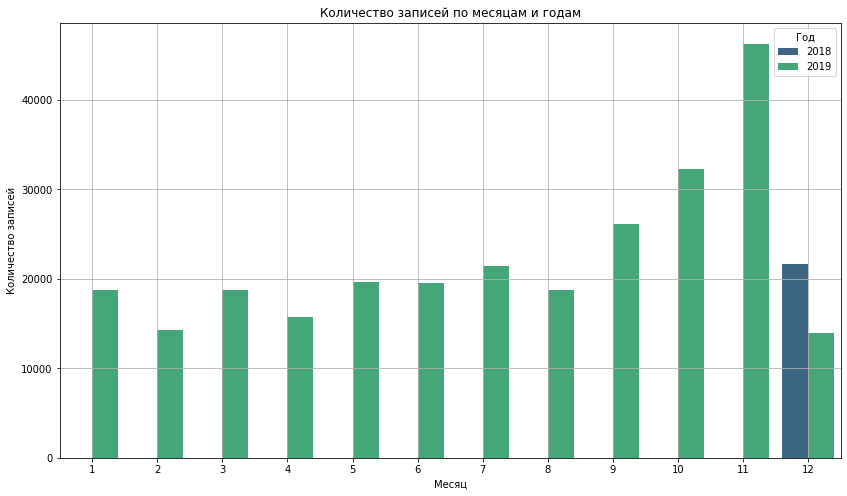

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика
plt.figure(figsize=(14, 8))
sns.barplot(data=records_per_year_month, x='month', y='counts', hue='year', palette='viridis')

# Настройки графика
plt.title('Количество записей по месяцам и годам')
plt.xlabel('Месяц')
plt.ylabel('Количество записей')
plt.legend(title='Год')
plt.grid(True)

# Показать график
plt.show()

- наибольшее количество записей приходится на ноябрь 2019 года (46,268 записей)и октябрь 2019 года (32,300 записей)
- декабрь 2018 года (21,633 записей) и большинство месяцев 2019 года имеют значительное количество записей,приближенное к 20 тысячаи, что указывает на активные периоды продаж

Для анализа предлагается брать годовой полный цикл вместе с сезооными колебаниями - ч декабря 2019 по ноябрь 2019

In [128]:
# Фильтрация данных за выбранный период (с декабря 2018 года по ноябрь 2019 года)
analysis_period = filtered_data[(filtered_data['year'] == 2018) & (filtered_data['month'] == 12) | 
                                ((filtered_data['year'] == 2019) & (filtered_data['month'] <= 11))]
print(f'Размер исходного датафрейма для анализа: {filtered_data.shape}')
print(f'Размер датафрейма для анализа: {analysis_period.shape}')

Размер исходного датафрейма для анализа: (287044, 12)
Размер датафрейма для анализа: (273087, 12)


In [129]:
analysis_period.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost,year,month
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034,2018,12
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200,2018,12
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034,2018,12
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530,2018,12
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550,2018,12


In [130]:
analysis_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273087 entries, 0 to 336642
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   273087 non-null  datetime64[ns]
 1   order_id     273087 non-null  int64         
 2   customer_id  273087 non-null  int64         
 3   quantity     273087 non-null  int64         
 4   price        273087 non-null  int64         
 5   name_clust   273087 non-null  int64         
 6   entry_id     273087 non-null  int64         
 7   country_id   273087 non-null  int64         
 8   entry        273087 non-null  object        
 9   total_cost   273087 non-null  int64         
 10  year         273087 non-null  int64         
 11  month        273087 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 27.1+ MB


In [131]:
comb_data.describe()

,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
count,353367.000000,353367.000000,353367.000000,3.533670e+05,353367.000000,353367.000000,353367.000000
mean,26663.279831,3479.992538,10.218348,4.016779e+02,468.644602,1517.811349,26.741045
std,13368.784949,2549.306356,147.510432,5.084618e+03,259.160574,833.700318,4.998306
min,3031.000000,-1.000000,-9600.000000,-1.106206e+06,0.000000,0.000000,0.000000
25%,14832.000000,-1.000000,1.000000,1.250000e+02,242.000000,875.000000,28.000000
50%,27316.000000,3630.000000,3.000000,2.080000e+02,448.000000,1558.000000,28.000000
75%,38445.000000,5633.000000,10.000000,4.130000e+02,702.000000,2223.000000,28.000000
max,48253.000000,7653.000000,80995.000000,1.354133e+06,929.000000,2916.000000,29.000000


In [132]:
filtered_data.describe()

,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,total_cost,year,month
count,287044.000000,287044.000000,287044.000000,287044.000000,287044.000000,287044.000000,287044.000000,287044.000000,287044.000000,287044.000000
mean,26840.026055,3357.074431,4.938887,256.513005,478.076413,1510.617020,26.966601,1023.904698,2018.924635,7.578479
std,13422.453882,2544.366348,4.515071,182.902203,255.922840,826.781953,4.577417,1087.447821,0.263979,3.501120
min,3031.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000
25%,14876.000000,-1.000000,1.000000,125.000000,267.000000,877.000000,28.000000,295.000000,2019.000000,5.000000
50%,27490.000000,3451.000000,3.000000,208.000000,456.000000,1538.000000,28.000000,663.000000,2019.000000,8.000000
75%,38769.000000,5502.000000,8.000000,375.000000,709.000000,2194.000000,28.000000,1500.000000,2019.000000,11.000000
max,48253.000000,7653.000000,23.000000,833.000000,929.000000,2916.000000,29.000000,19159.000000,2019.000000,12.000000


In [133]:
analysis_period.describe()

,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,total_cost,year,month
count,273087.000000,273087.000000,273087.000000,273087.000000,273087.000000,273087.000000,273087.000000,273087.000000,273087.000000,273087.000000
mean,25785.911006,3370.836184,4.955651,256.725505,478.653371,1511.513455,26.951418,1027.393398,2018.920783,7.352503
std,12903.763648,2540.265546,4.519364,182.571692,256.126875,826.583183,4.609106,1085.090312,0.270077,3.440071
min,3031.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000
25%,14316.000000,-1.000000,1.000000,125.000000,267.000000,877.000000,28.000000,298.000000,2019.000000,5.000000
50%,26482.000000,3473.000000,3.000000,208.000000,456.000000,1538.000000,28.000000,672.000000,2019.000000,8.000000
75%,37165.000000,5502.000000,8.000000,375.000000,709.000000,2195.000000,28.000000,1500.000000,2019.000000,10.000000
max,46551.000000,7653.000000,23.000000,833.000000,929.000000,2916.000000,29.000000,19159.000000,2019.000000,12.000000


 ___Выводы по шагу 2___
 - Были обнаружены выбросы и аномалии в столбцах  price и quantity. Данные были отфилтиованы
 - В индефикаторов customer_id выделяется значение -1. Возможно, это аномалия, но решил оставить
 - Интререс вызывает преобладание country_id= 28- некий основной регион продаж
 - Основной массив данных охватывает период с декабря 2018 по декабрь 2019:
   - Пиковые месяцы: ноябрь 2019 , октябрь 2019 
   - Минимальные продажи: февраль 2019 
   
- Количество дней без продаж варьируется по месяцам:
  - Максимум пропусков в январе и апреле 2019 
  - Минимум пропусков в декабре обоих лет(повышенную активность в предновогодний период)
  
- Выбран период с декабря 2018 по ноябрь 2019 (полный годовой цикл)
- Данные структурированы по годам и месяцам для дальнейшего анализа

<div class="alert alert-info">
  <b> * <a href="#chapter0">к содержанию</a> </b> 
</div>